IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np

IMPORT DATASET

In [2]:
dataset = pd.read_csv('penguins.csv')
dataset

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


MENGECEK DATA DALAM DARI DATASET

In [3]:
dataset.info()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

MENGHILANGKAN MISSING VALUE DALAM DATASET

In [4]:
df = dataset.dropna(subset=['sex', 'culmen_length_mm', 'culmen_depth_mm','flipper_length_mm','body_mass_g'])
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [5]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

MENGUBAH DATA KATEGORIKAL MENJADI NUMERIK

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df

C:\Users\Argi\AppData\Local\Temp\ipykernel_32080\1166566442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = le.fit_transform(df['sex'])


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,2
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1
340,46.8,14.3,215.0,4850.0,1
341,50.4,15.7,222.0,5750.0,2
342,45.2,14.8,212.0,5200.0,1


MENGIMPORT LIBRARY UNTUK MODEL K-MEANS

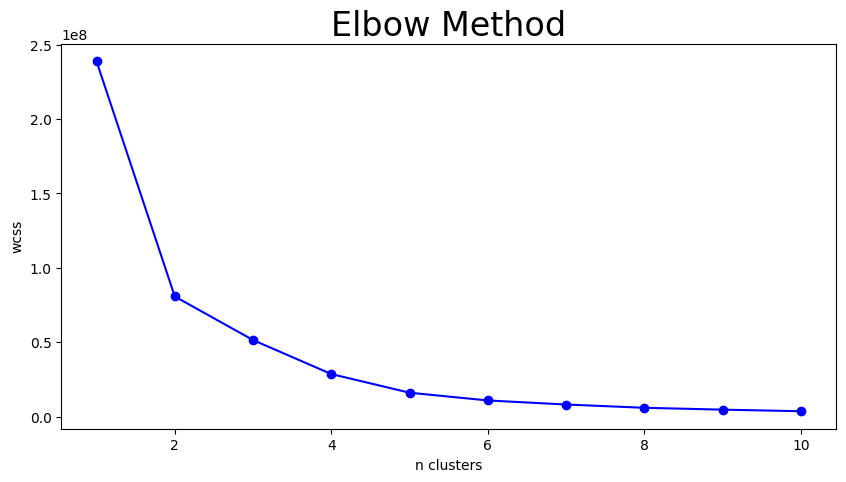

In [7]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(df)
    wcss.append(model.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, 'bo-')
plt.title('Elbow Method', fontsize=24)
plt.xlabel('n clusters')
plt.ylabel('wcss')
plt.show()

MENJALANKAN MODEL KMEANS

In [8]:
model = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = model.fit_predict(df)

C:\Users\Argi\AppData\Local\Temp\ipykernel_32080\4043512549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = model.fit_predict(df)


MENJALANKAN MODEL DBSCAN

In [22]:
model2 = DBSCAN(eps=3, min_samples=2).fit(df[['body_mass_g', 'sex']])
cluster = model2.labels_

MEMERIKSA BANYAKNYA CLUSTER DALAM K-MEANS DAN DBSCAN

In [32]:
df['label'] = cluster

clusterKmeans = len(set(df['cluster']))
clusterDBS = len(set(df['label']))
print('jumlah cluster dari K-Means: ', clusterKmeans)
print('jumlah cluster dari DBSCAN: ', clusterDBS)

jumlah cluster dari K-Means:  2
jumlah cluster dari DBSCAN:  71


C:\Users\Argi\AppData\Local\Temp\ipykernel_32080\2382792898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = cluster


MEMVISUALISASIKAN HASIL DARI MODEL K-MEANS

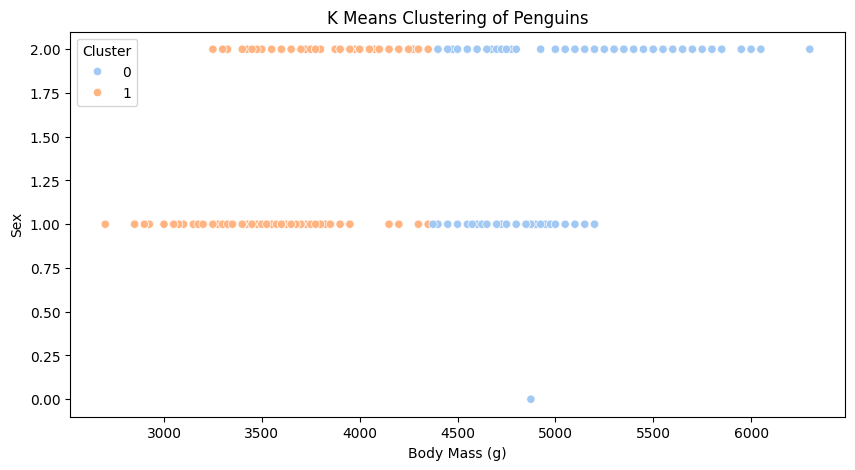

In [26]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(x='body_mass_g', y='sex', hue='cluster', data=df, palette=sns.color_palette('pastel', clusterKmeans))
plt.xlabel('Body Mass (g)')
plt.ylabel('Sex')
plt.title('K Means Clustering of Penguins')
plt.legend(title='Cluster')
plt.show()

VISUALISASI MODEL DBSCAN

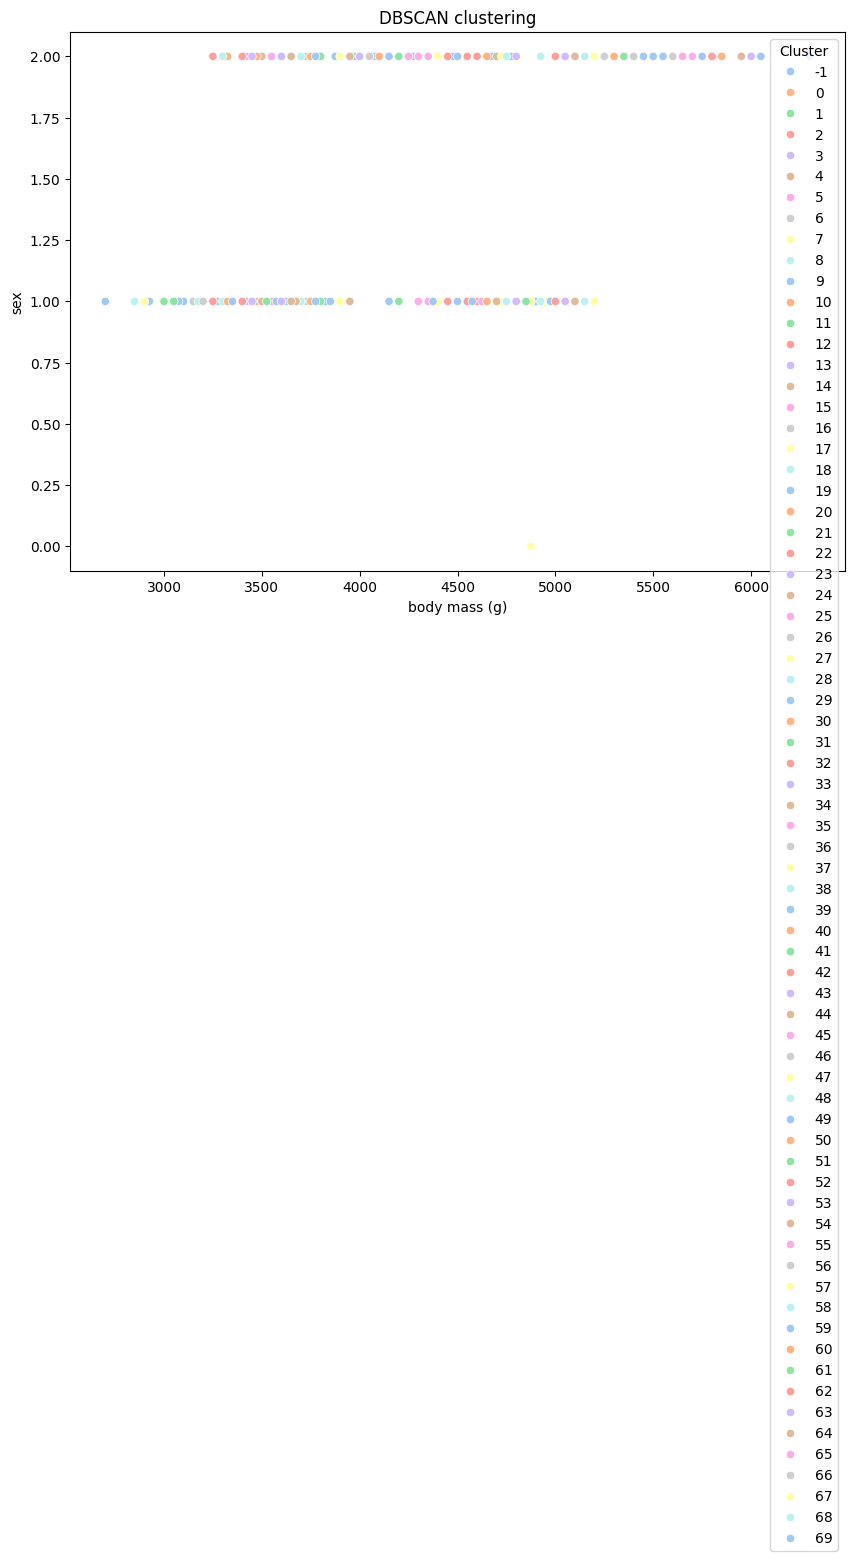

In [30]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x='body_mass_g', y='sex', hue=cluster, data=df, palette = sns.color_palette('pastel', clusterDBS))
plt.xlabel('body mass (g)')
plt.ylabel('sex')
plt.title('DBSCAN clustering')
plt.legend(title = 'Cluster')
plt.show()

MENGUJI METRIK EVALUASI HASIL

In [31]:
from sklearn.metrics import silhouette_score

silhouetteScore = silhouette_score(df[['body_mass_g', 'sex']], df['cluster']) 
print('silhouette score K-Means: ', silhouetteScore)

if len(set(cluster)) > 1:
    silhouetteScore2 = silhouette_score(df[['body_mass_g', 'sex']], cluster)
    print('silhouette score DBSCAN: ', silhouetteScore2)
else:
    print('silhouette score tidak bisa dijalankan karena hanya 1 cluster')

silhouette score K-Means:  0.6273378911575574
silhouette score DBSCAN:  0.8556993545812244
